In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="darkgrid")



In [28]:
# Define the stock symbol and the period of interest
symbol = 'MSFT'
start_date = '2019-01-01'
end_date = '2024-08-09'

# Fetch historical data
data = yf.download(symbol, start=start_date, end=end_date)
# Extract adjusted close prices
adj_close = data['Adj Close']


[*********************100%%**********************]  1 of 1 completed


In [29]:
daily_returns = adj_close.pct_change().dropna()

#calculate mean and standard deviation of daily returns
mean = daily_returns.mean()
std = daily_returns.std()

# Calculate annualized return and volatility
trading_days = 252  # Typical number of trading days in a year
annualized_return = ((1 + mean) ** trading_days) - 1
annualized_volatility = std * (trading_days ** 0.5)

print(f'Mean Daily Return: {mean * 100:.2f}%')
print(f'Daily Std. Deviation: {std * 100:.2f}%')
print(f'Annualized Return: {annualized_return * 100:.2f}%')
print(f'Annualized Volatility: {annualized_volatility * 100:.2f}%')


Mean Daily Return: 0.12%
Daily Std. Deviation: 1.86%
Annualized Return: 35.07%
Annualized Volatility: 29.55%


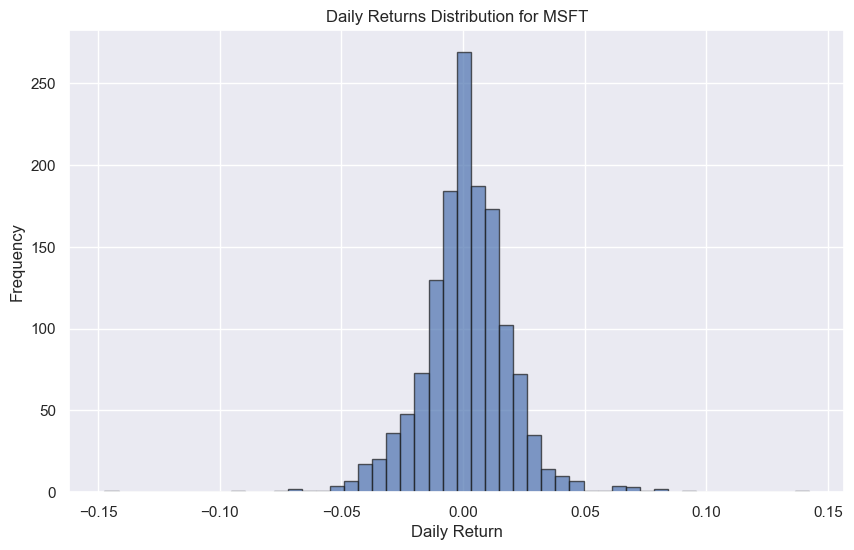

In [30]:
# Plot histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(daily_returns, bins=50, edgecolor='k', alpha=0.7)
plt.title(f'Daily Returns Distribution for {symbol}')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

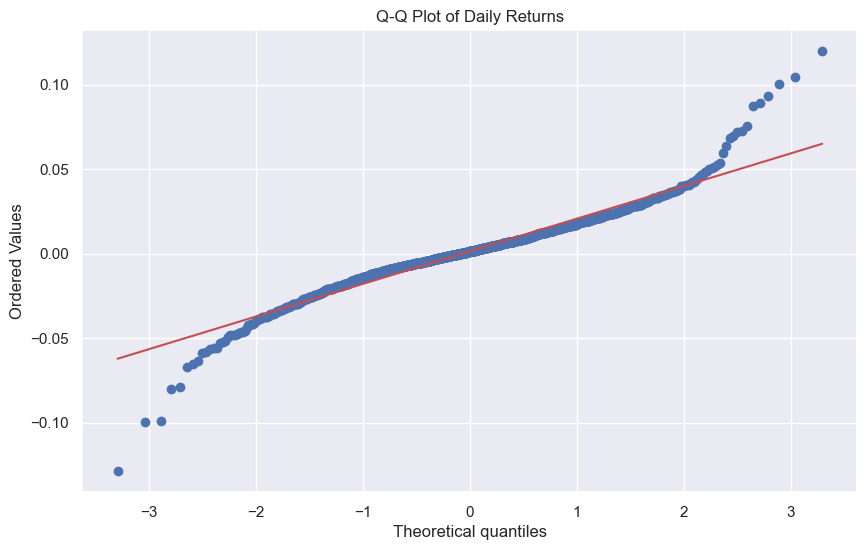

Skewness: -0.003548900144872504
Kurtosis: 5.275704982815611


In [21]:
from scipy import stats
import numpy as np

# Fit a normal distribution to the data
mu, std = stats.norm.fit(daily_returns)

# Plot the Q-Q plot to check for normality
plt.figure(figsize=(10, 6))
stats.probplot(daily_returns, dist="norm", plot=plt)
plt.title('Q-Q Plot of Daily Returns')
plt.show()

# Calculate skewness and kurtosis
skewness = stats.skew(daily_returns)
kurtosis = stats.kurtosis(daily_returns)

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')